# Probability density of the mass kink

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy as sc
import scipy.integrate as integrate

from scipy.special import pbdv, gamma

import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

### Contour plot/solution of the implicit quantization condition:

<IPython.core.display.Javascript object>


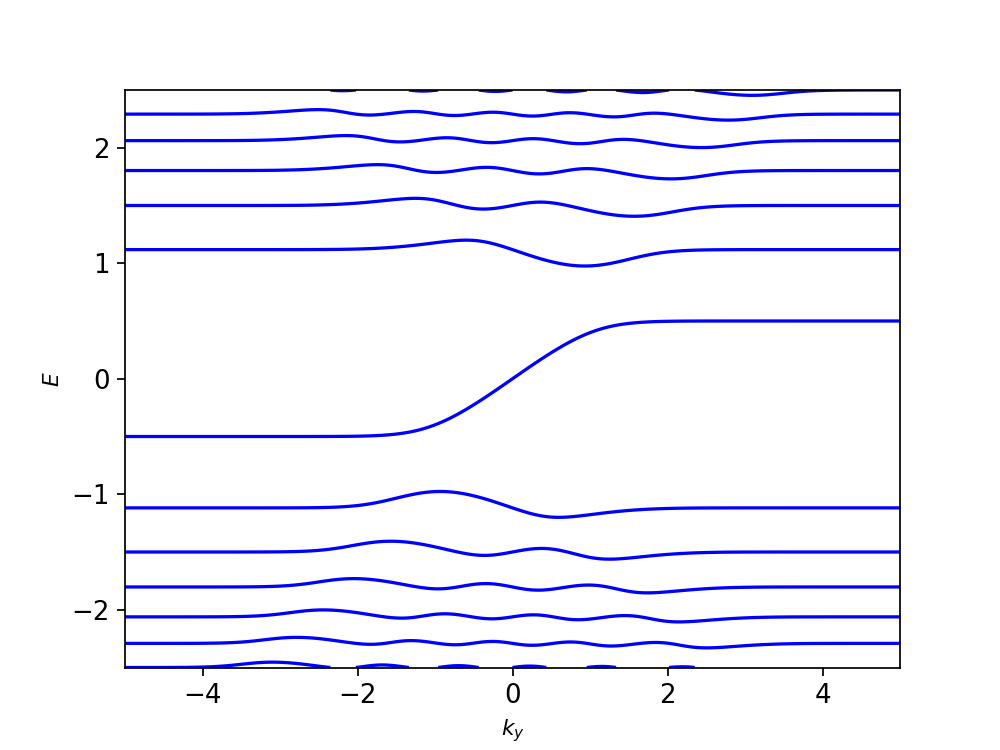

In [3]:
#Contour plot:
fig, ax = plt.subplots(1,1)

#mass
M1 = 0.5

#--------------------
#DO NOT CHANGE!
N = 800
#--------------------

#Energy and momentum range
E_min = -2.5
E_max = 2.5

ky_min = -5
ky_max = 5


ky = np.linspace(ky_min, ky_max, N)
E = np.linspace(E_min, E_max, N)

ky_, E_ = np.meshgrid(ky, E)

#quantization condition
omega = lambda E, x, M: (E - M)*pbdv(E**2 - M**2 -1 , -np.sqrt(2)*x)[0]*pbdv(E**2 - M**2, np.sqrt(2)*x)[0] + (E + M)*pbdv(E**2 - M**2 -1, np.sqrt(2)*x)[0]*pbdv(E**2 - M**2, -np.sqrt(2)*x)[0]


con1 = ax.contour(ky_, E_, omega(E_, ky_, M1), cmap = 'bwr', levels = [0])




ax.set_xlabel('$k_y$')
ax.set_ylabel('$E$')

ax.tick_params(axis = 'both', which='major', labelsize = 12)

### Probability densities:

In [4]:
#x<0:
def rho_L(x, ky, E):
    return (E - M)**2*pbdv(E**2 - M**2 - 1, -np.sqrt(2)*(x + ky))[0]**2 + pbdv(E**2 - M**2, -np.sqrt(2)*(x + ky))[0]**2

#x>0:
def rho_R(x, ky, E):
    return ((E + M)**2*pbdv(E**2 - M**2 - 1, np.sqrt(2)*(x + ky))[0]**2 + pbdv(E**2 - M**2, np.sqrt(2)*(x + ky))[0]**2)*(np.abs(pbdv(E**2 - M**2, -np.sqrt(2)*ky)[0]/pbdv(E**2 - M**2, np.sqrt(2)*ky)[0]))**2

In [5]:
M=0.5

#choose band n:
n=1

#contour_data contains all pairs (ky, E) of band n.
contour_data = con1.allsegs[0][11+n][::(-1)**n]

#Initial pair (ky, E)
initial_con_pair = int(len(contour_data)/2)


def rho(x, con_pair):
    """ Gives the probability density for a given pair (ky, E)"""
    
    ky, E = contour_data[int(con_pair)]
    rho_arr = np.zeros_like(x)
    for (xi, i) in zip(x, range(len(x))):
        if xi<0:
            rho_arr[i] = (E - M)**2*pbdv(E**2 - M**2 - 1, -np.sqrt(2)*(xi + ky))[0]**2 + pbdv(E**2 - M**2, -np.sqrt(2)*(xi + ky))[0]**2
        elif xi>=0:
            rho_arr[i] = ((E + M)**2*pbdv(E**2 - M**2 - 1, np.sqrt(2)*(xi + ky))[0]**2 + pbdv(E**2 - M**2, np.sqrt(2)*(xi + ky))[0]**2)*(np.abs(pbdv(E**2 - M**2, -np.sqrt(2)*ky)[0]/pbdv(E**2 - M**2, np.sqrt(2)*ky)[0]))**2
    return rho_arr



<IPython.core.display.Javascript object>


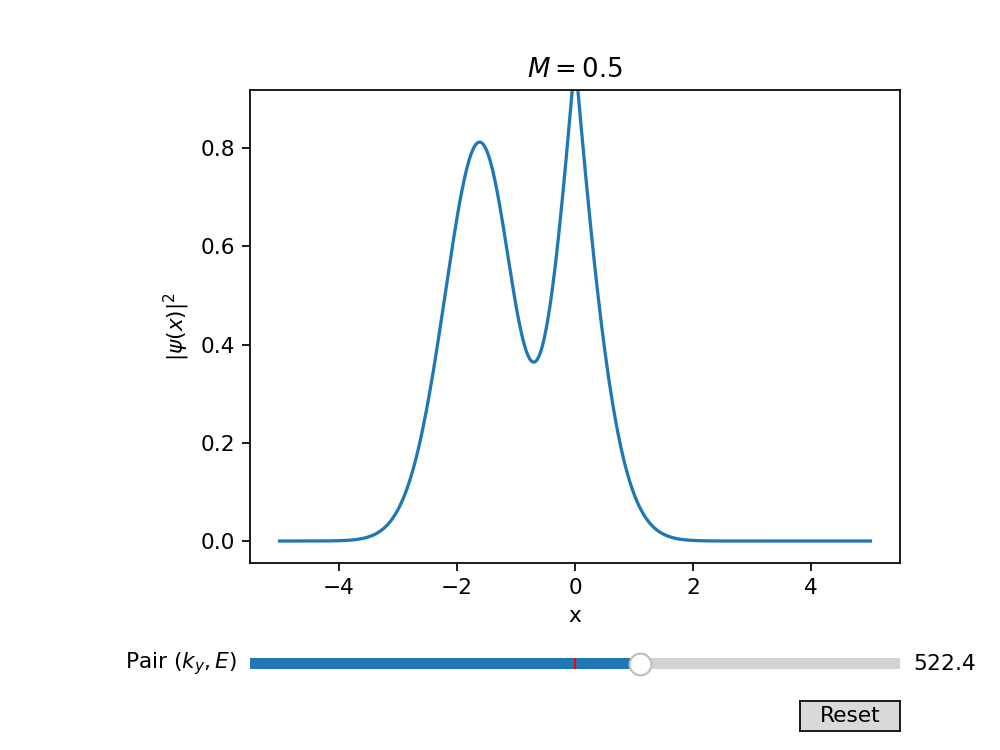

In [6]:
#x interval
x = np.linspace(-5,5, 500)


fig, ax = plt.subplots(1,1)

line, = ax.plot(x, rho(x, initial_con_pair))
fig.subplots_adjust(left=0.25, bottom=0.25)

ax.set_xlabel('x')
ax.set_ylabel('$|\psi(x)|^2$')
ax.set_title('$M=0.5$')

axpair = fig.add_axes([0.25, 0.1, 0.65, 0.03])

#Generate the slider
con_pair_slider = Slider(
    ax = axpair,
    label = "Pair $(k_y, E)$",
    valmin = 0,
    valmax = len(contour_data) - 1,
    valinit = initial_con_pair
)

#Update the function
def update(val):
    line.set_ydata(rho(x, con_pair_slider.val))
    fig.canvas.draw_idle()
    
con_pair_slider.on_changed(update)

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    con_pair_slider.reset()
button.on_clicked(reset)

plt.show()